# Quiz 1: Food vs Feed (30 minutes)

Name: SM PURNIMA WIJENDRA

Matric ID: MAN171031

## Overview

The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

Food - refers to the total amount of the food item available as human food during the reference period.
Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

### Instructions
1. Download FAO.csv
2. Read and create Dataframe from the CSV file
Note: The CSV file is Latin1-encoded. Read in the file using, e.g., fao = pd.read_csv("fao.csv", encoding='latin1')
3. Answer the questions by editing this notebook:
    a. What is your strategies to find the outliers of the data?  What type of visualization is the most suitable to find outliers?
    b. Compare between food and feed consumption. Explain your strategies (the steps that you are going to do).



### [START] Import nessasary libraries & read data file

In [49]:
%matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using matplotlib backend: MacOSX


In [7]:
df = pd.read_csv("fao.csv", encoding='latin1')

Q3. What is your strategies to find the outliers of the data?  What type of visualization is the most suitable to find outliers?

The strategy to find the outliers of the data is by using the z-score or standard score of an observation . By ‘tagging’ or removing the data points that lay beyond a given threshold we are classifying data into outliers and not outliers.  

The type of visualization is the most suitable to find outliers would probably be using scatterplots and histograms. T

Q4 . Compare between food and feed consumption. Explain your strategies (the steps that you are going to do).

The comparison of food and feed and can determine the supply and demand of the . The compariosn can be made to their countries and see which countries has the highest. 

The best method in my opinion is using clustering technique and other relevant stastical methods for this.

### [Understanding the Dataset]

In [8]:
pd.set_option ("max_columns", 100)
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [9]:
df.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,18062.000000,18062.000000,20490.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,225.988962,230.419222,238.415487,244.340952,250.262237,254.238655,257.454677,267.323336,267.126547,274.443528,276.573364,285.963095,299.790166,305.835099,305.666072,311.656428,320.981157,326.911473,339.557866,344.345468,351.743227,361.941800,363.976363,372.351656,375.418115,379.449950,386.007760,389.309370,397.079607,404.490822,415.261922,421.623053,428.878505,441.677019,451.771819,458.723826,465.458964,472.693298,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,2100.228354,2132.244717,2189.166883,2266.964627,2322.967733,2372.627182,2421.964322,2528.042608,2365.411987,2464.376834,2427.373749,2555.249955,2757.473984,2768.374398,2730.433908,2774.265032,2931.209478,3002.929914,3101.632149,3094.241689,3231.480597,3312.098595,3236.741120,3349.602911,3422.824069,3453.922037,3509.290447,3555.648726,3714.324984,3754.281929,3962.388448,4036.101905,4149.057052,4340.531660,4649.579544,4751.597094,4868.625666,4911.216237,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
Area Abbreviation    21477 non-null object
Area Code            21477 non-null int64
Area                 21477 non-null object
Item Code            21477 non-null int64
Item                 21477 non-null object
Element Code         21477 non-null int64
Element              21477 non-null object
Unit                 21477 non-null object
latitude             21477 non-null float64
longitude            21477 non-null float64
Y1961                17938 non-null float64
Y1962                17938 non-null float64
Y1963                17938 non-null float64
Y1964                17938 non-null float64
Y1965                17938 non-null float64
Y1966                17938 non-null float64
Y1967                17938 non-null float64
Y1968                17938 non-null float64
Y1969                17938 non-null float64
Y1970                17938 non-null float64
Y1971                1

In [10]:
#Checking for Missing/NA values: 
df.notnull().head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [11]:
df.notnull().sum()

Area Abbreviation    21477
Area Code            21477
Area                 21477
Item Code            21477
Item                 21477
Element Code         21477
Element              21477
Unit                 21477
latitude             21477
longitude            21477
Y1961                17938
Y1962                17938
Y1963                17938
Y1964                17938
Y1965                17938
Y1966                17938
Y1967                17938
Y1968                17938
Y1969                17938
Y1970                17938
Y1971                17938
Y1972                17938
Y1973                17938
Y1974                17938
Y1975                17938
Y1976                17938
Y1977                17938
Y1978                17938
Y1979                17938
Y1980                17938
                     ...  
Y1984                17938
Y1985                17938
Y1986                17938
Y1987                17938
Y1988                17938
Y1989                17938
Y

#### STEP 2: DATA EXPLORATION
###### 2.1: Comparison between Food & Feed 

In [12]:
df.Element.unique()

array(['Food', 'Feed'], dtype=object)

In [13]:
# Food and Feed COUNT
df["Element"].value_counts()

Food    17528
Feed     3949
Name: Element, dtype: int64

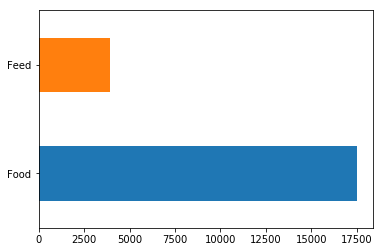

In [16]:
#Plot the bar graph
df["Element"].value_counts()[:].plot(kind='barh')

In [17]:
df["Element"].value_counts().sum()

21477

In [18]:
#Produceable items around the globe
df['Item']

0                  Wheat and products
1            Rice (Milled Equivalent)
2                 Barley and products
3                 Barley and products
4                  Maize and products
5                  Maize and products
6                 Millet and products
7                      Cereals, Other
8               Potatoes and products
9                          Sugar cane
10                         Sugar beet
11             Sugar (Raw Equivalent)
12                  Sweeteners, Other
13                              Honey
14         Pulses, Other and products
15         Pulses, Other and products
16                  Nuts and products
17              Coconuts - Incl Copra
18                        Sesame seed
19       Olives (including preserved)
20                       Soyabean Oil
21                      Groundnut Oil
22                  Sunflowerseed Oil
23               Rape and Mustard Oil
24                     Cottonseed Oil
25                           Palm Oil
26          

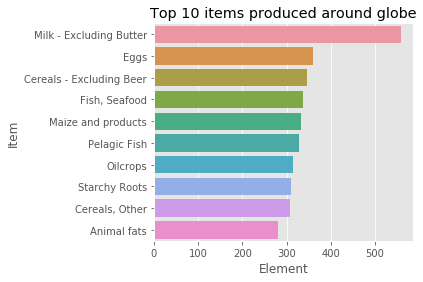

In [27]:
plt.style.use("ggplot")
items=pd.DataFrame(df.groupby("Item")["Element"].agg("count").sort_values(ascending=False))[:10]
plt.gcf().subplots_adjust(left=.3)
sns.barplot(x=items.Element,y=items.index,data=items)
plt.gca().set_title("Top 10 items produced around globe")
plt.show()

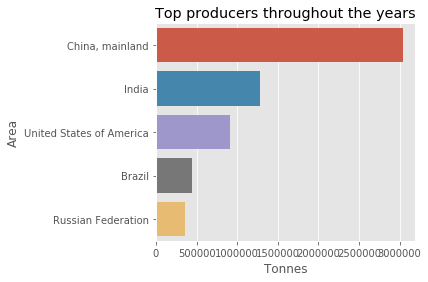

In [33]:
#Top producers throughout the years
top_countries=df.groupby(["Area"])[["Y2010","Y2011","Y2012","Y2013"]].sum()
top=pd.DataFrame(top_countries.agg("mean",axis=1).sort_values(ascending=False),columns=["Tonnes"])[:5]
plt.gca().set_title("Top producers throughout the years")
sns.barplot(x=top["Tonnes"],y=top.index,data=top)
plt.gcf().subplots_adjust(left=.3)
plt.show()

In [34]:
#comparison of food and feed for the top5 countries

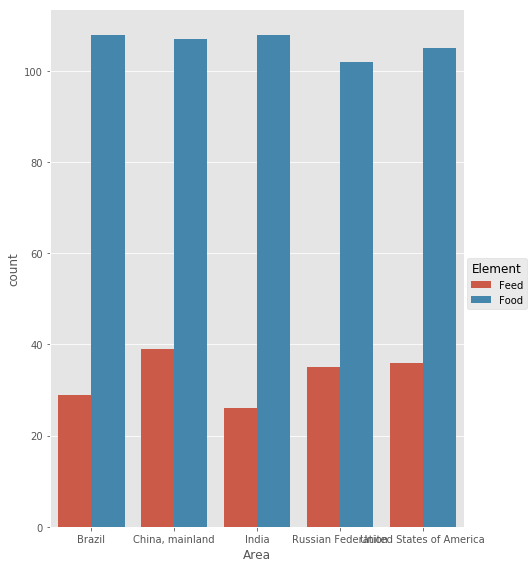

In [35]:
sns.factorplot("Area", data=df[(df['Area'] == "India") | (df['Area'] == "China, mainland") | (df['Area'] == "United States of America")| (df['Area'] == "Brazil")| (df['Area'] == "Russian Federation")], kind="count", hue="Element", size=8, aspect=.8)

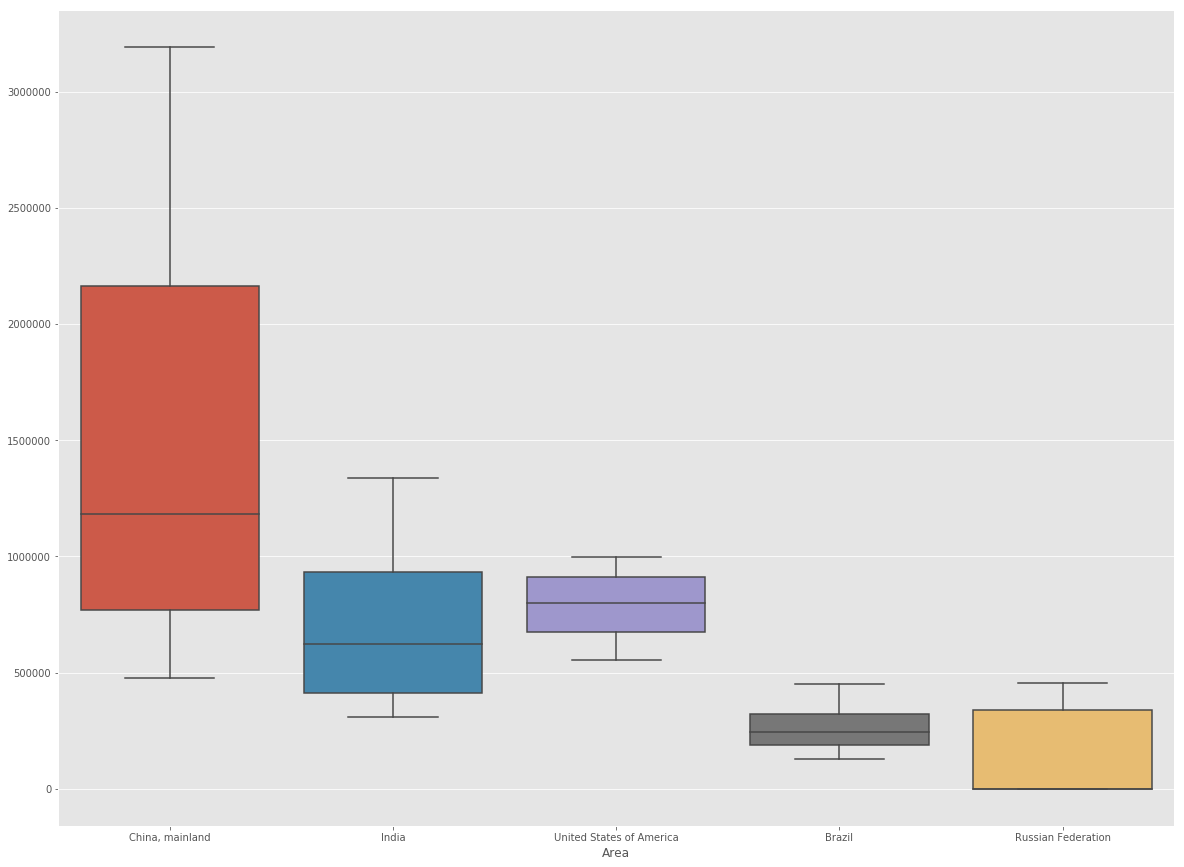

In [40]:
#boxplot of top producer
top_box=df.groupby("Area").agg("sum").loc[top.index].drop(["Area Code","Item Code",
                                                            "latitude","longitude","Element Code"],axis=1)
top_box=top_box.transpose()
plt.style.use("ggplot")
plt.figure(figsize=(20,15))
sns.boxplot(data=top_box)
plt.show()

In [41]:
lower_bound = 0.1
upper_bound = 0.95
res = df.Y1961.quantile([lower_bound, upper_bound])
res

0.10      0.00
0.95    559.15
Name: Y1961, dtype: float64

In [42]:
df.Y1961.describe()


count     17938.000000
mean        195.262069
std        1864.124336
min           0.000000
25%           0.000000
50%           1.000000
75%          21.000000
max      112227.000000
Name: Y1961, dtype: float64

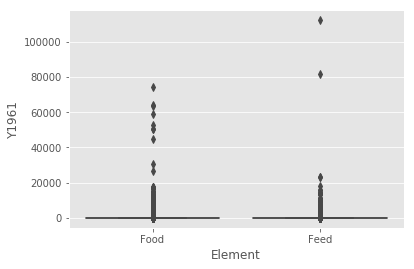

In [48]:
ax = sns.boxplot(x="Element", y="Y1961", data=df)
